# DETECTING FRAUDULENT CUSTOMER  TRANSACTIONS USING PAYSIM DATASET

## Importing the necessary libraries

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import math

import warnings
warnings.filterwarnings("ignore")

import sys
import seaborn as sns



In [4]:
# Loading the dataset
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [5]:
# Checking for the first 5 rows and columns
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# Checking for the last 5 rows and columns
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
# Checking for the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Checking for the number of rows and columns
df.shape

(6362620, 11)

## DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

In [10]:
# Checking for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
#Defining a function to plot a bar chart
def plot_barchart(x, y, title, xlable=None, ylable=None):
    plt.figure(figsize=(15, 5))
    sns.barplot(x, y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlable, fontsize=14)
    plt.ylabel(ylable, fontsize=14)
    plt.xticks(rotation=65)
    plt.show()

In [12]:
# Defining a function to plot the Percentage on bar chart
def plot_percentage(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=18)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

Total unique values are:  5 


Category	Value

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


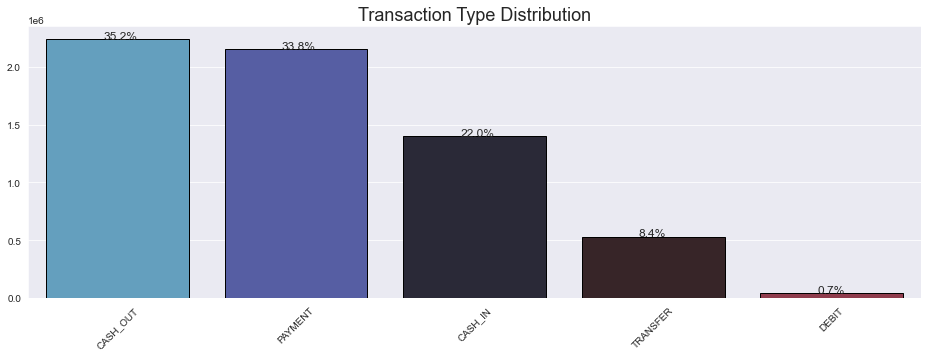

In [13]:
#To check for the distribution of the transaction type in the dataset
plot_percentage(df.type, "Transaction Type Distribution")

Total unique values are:  2 


Category	Value

0    6354407
1       8213
Name: isFraud, dtype: int64


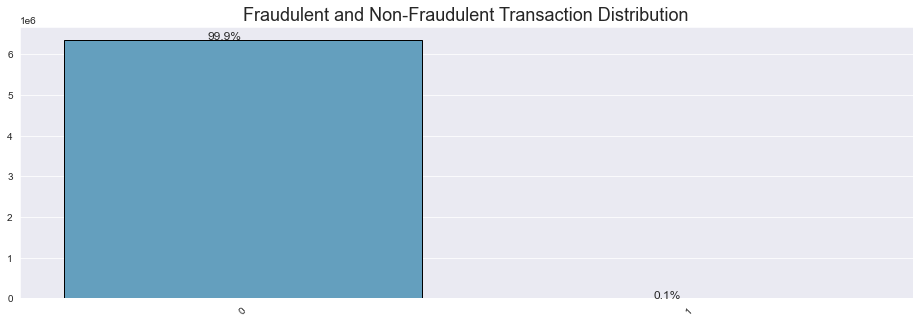

In [14]:
#To check for the distribution of the Fraudulent and Non-fraudulent transactions in the dataset
plot_percentage(df.isFraud, "Fraudulent and Non-Fraudulent Transaction Distribution")

In [15]:
# Checking for the first 10 rows and columns
df[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [16]:
# Use one-hot encoding to create binary columns for the 'type' column
df = pd.get_dummies(df, columns=['type'])

In [17]:
# Display the updated DataFrame with additional columns for each method
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [18]:
# Checking for the new number of columns
df.shape

(6362620, 15)

In [19]:
# Removing the 'C' prefixes from 'nameOrig columns
df['nameOrig'] = df['nameOrig'].str[1:]

In [20]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [21]:
# Separate rows starting with 'C' and 'M' in the "nameDest" column using one-hot encoding
df[['nameDest_C', 'nameDest_M']] = pd.get_dummies(df['nameDest'].str[0])

# Remove the prefix in front of the nameDest column
df['nameDest'] = df['nameDest'].str[1:]

# To display the updated DataFrame
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C,nameDest_M
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,0,0,0,1,0,0,1
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,0,0,0,1,0,0,1
2,1,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0,0,0,0,0,1,1,0
3,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0,0,1,0,0,0,1,0
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,0,0,0,1,0,0,1


In [22]:
# Comparing the isFraud and isFlaggedFraud columns to check for the accuracy of the isFlaggedFraud column
fraud_and_flagged_fraud_transactions = df[(df["isFraud"] == 1) & (df["isFlaggedFraud"] == 1)]
fraud_and_not_flagged_fraud_transactions = df[(df["isFraud"] == 1) & (df["isFlaggedFraud"] == 0)]
wrong_flags = df[(df["isFraud"] == 0) & (df["isFlaggedFraud"] == 1)]

print("No. of fraud transactions: ", len(df[df["isFraud"] == 1]),
      "\nNo. of fraud transactions which were flagged fraud: ", len(fraud_and_flagged_fraud_transactions),
      "\nNo. of fraud transactions which were not flagged fraud: ", len(fraud_and_not_flagged_fraud_transactions),
      "\nNo. of genuine transactions which were falsely flagged fraud: ", len(wrong_flags))

No. of fraud transactions:  8213 
No. of fraud transactions which were flagged fraud:  16 
No. of fraud transactions which were not flagged fraud:  8197 
No. of genuine transactions which were falsely flagged fraud:  0


From the result gotten above, it shows that the "isFlaggedFraud" column doesn't accurately identify the Fraudulent transcations. We have about 8197 transactions that were not flagged as fraudulent and only 16 transactions that were identified as fraudulent. Due to this inaccuracy in effectively identifying whether a transcation is fraudulent or not, i would be dropping the "isFlaggedFraud" column.

In [23]:
# Dropping the "isFlaggedFraud" column from the DataFrame
df.drop("isFlaggedFraud", axis=1, inplace=True)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C,nameDest_M
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,0,0,1,0,0,1
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,0,0,1,0,0,1
2,1,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0,0,0,0,1,1,0
3,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0,1,0,0,0,1,0
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,0,0,1,0,0,1


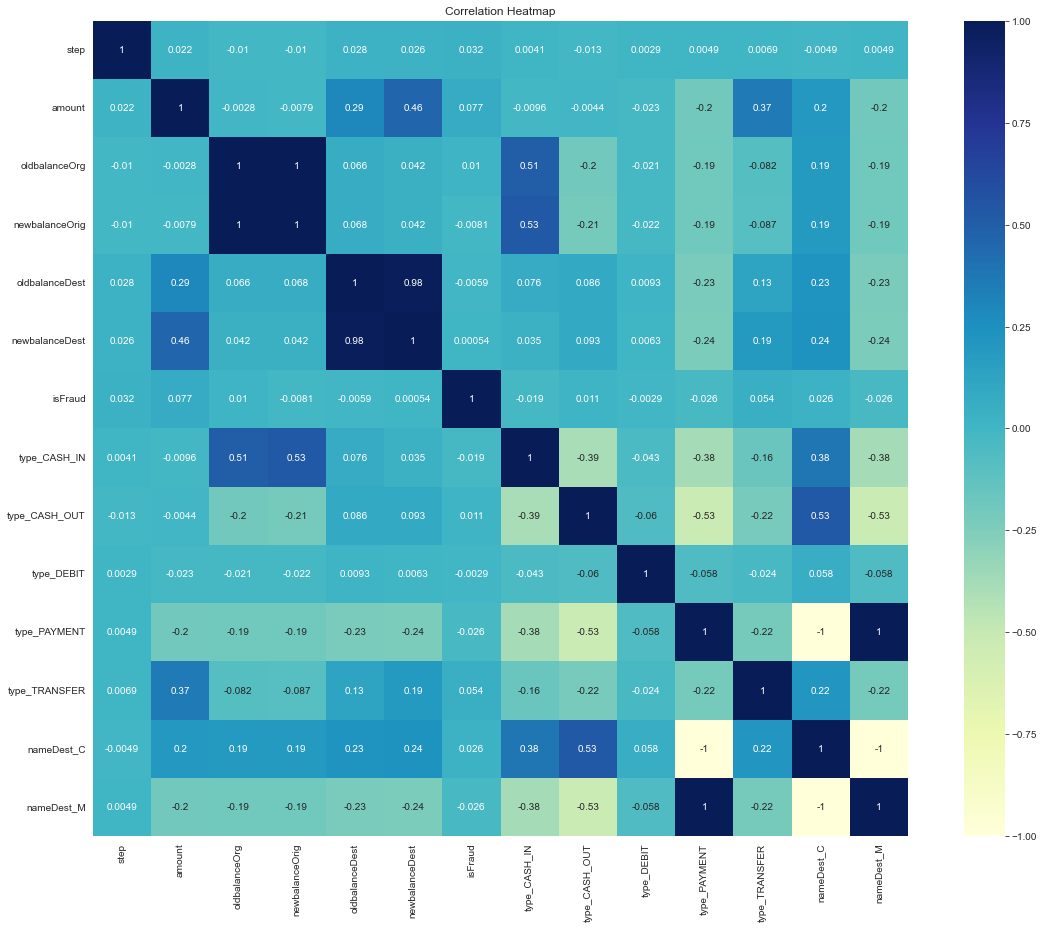

In [24]:
# Plotting a correlation plot using heatmap  to check for the correlation between the parameters
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True, square=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

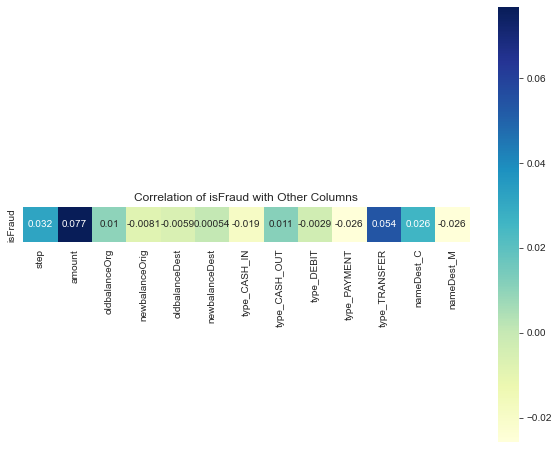

In [25]:
# Finding correlation of the isFraud column with other columns to see the relationship with other parameters

# Calculate the correlation matrix
corr = df.corr()

# Select only the correlations involving the "isFraud" column from the correlation matrix
fraud_corr = corr.loc["isFraud"]

# Plot the correlation heatmap for "isFraud" with other columns
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(fraud_corr).T.drop("isFraud", axis=1), annot=True, square=True, cmap='YlGnBu')
plt.title("Correlation of isFraud with Other Columns")
plt.show()

## Machine Learning Algorithm

In carrying out the modelling, several steps would be done to help improve and optimize the accuracy of the model. We would be Resampling the data, carrying out normalization (scaling) and using hyperparameter tuning to optimize the model parameters before finally feeding the data into the model.

In [26]:
# Creating a copy of the data
df1 = df.copy()
df2 =df.copy()
df3 = df.copy()

## Machine Learning on the Original dataset

In [27]:
# Separate the parameter and target classes (i.e the label)
X = df.drop("isFraud", axis=1)  # Independent variables
y = df['isFraud']  # Dependent

### Normalization (Scaling)

Min-Max scaling, also known as normalization, is a data preprocessing technique that scales the features of a dataset to a specific range, typically between 0 and 1. This transformation can improve machine learning in several ways such as:

- Feature Scaling
- Faster Convergence
- Outlier Handling
- Interpretability
- Compatibility with Certain Algorithms
- Visualizations

Min-Max scaling can improve the performance and convergence of certain machine learning algorithms and is particularly useful when features have different scales or when using distance-based optimization techniques.

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the features (independent variables)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Data Splitting

In [29]:
# Spliting data into train and test data with the testing size as 20% and training size as 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# To check for the first 3 X_train data
X_train[:5]

array([[8.32884097e-01, 4.17959782e-03, 1.96206742e-01, 7.83681411e-02,
        1.01965308e-01, 9.20658893e-01, 1.42138336e-03, 3.35926279e-04,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.19676550e-01, 2.29820534e-03, 3.89146458e-02, 3.93781725e-03,
        9.01670699e-03, 7.87242320e-01, 2.26405030e-03, 1.66651778e-03,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.13477089e-01, 2.15993168e-04, 3.97206435e-01, 6.09884625e-05,
        0.00000000e+00, 7.89489974e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.41239892e-01, 5.70732394e-03, 2.87591242e-02, 3.02451754e-03,
        0.00000000e+00, 2.68991453e-01, 2.58856705e-04, 1.74006083e-03,
        0.00000000e+00, 1.00000000e+0

### 1. LOGISTIC REGRESSION

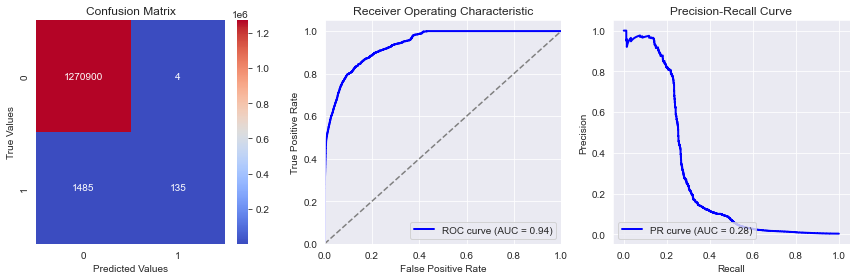

Logistic Regression - Accuracy: 0.9988298845444172
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.08      0.15      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.54      0.58   1272524
weighted avg       1.00      1.00      1.00   1272524

Logistic Regression - ROC AUC: 0.9375033416478195
Logistic Regression - PR AUC: 0.27571907707174564


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluation metrics
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# ROC curve and AUC
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = roc_auc_score(y_test, y_prob_lr)

# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
pr_auc = auc(recall, precision)

# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(conf_matrix_lr, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")

# Plot ROC curve
plt.subplot(132)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(133)
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Print the evaluation metrics
print("Logistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - Classification Report:\n", classification_report_lr)
print("Logistic Regression - ROC AUC:", roc_auc)
print("Logistic Regression - PR AUC:", pr_auc)


### 2. RANDOM FOREST CLASSIFIER (RFC)

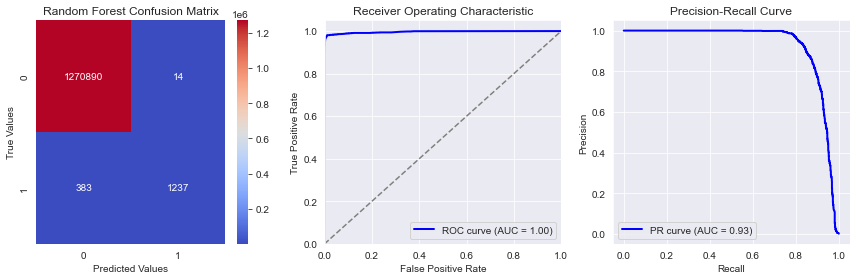

Random Forest - Accuracy: 0.9996880216011643
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.76      0.86      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

Random Forest - ROC AUC: 0.9963380032667328
Random Forest - PR AUC: 0.9279550243954067


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluation metrics
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC curve and AUC
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Precision-Recall curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(conf_matrix_rf, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Random Forest Confusion Matrix")

# Plot ROC curve
plt.subplot(132)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(133)
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Print the evaluation metrics
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Classification Report:\n", classification_report_rf)
print("Random Forest - ROC AUC:", roc_auc_rf)
print("Random Forest - PR AUC:", pr_auc_rf)


### K-NEAREST NEIGHBOR (KNN)

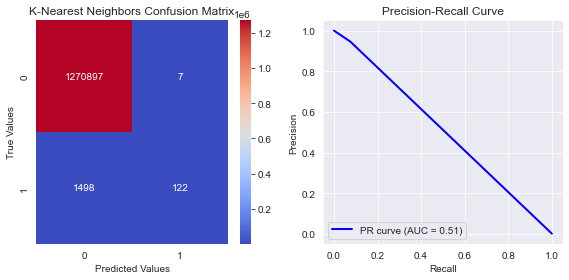

K-Nearest Neighbors - Accuracy: 0.9988173111076883
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.08      0.14      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.54      0.57   1272524
weighted avg       1.00      1.00      1.00   1272524

K-Nearest Neighbors - PR AUC: 0.5111111320487893


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluation metrics
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# ROC curve and AUC
# KNN does not directly provide probability estimates, so we will not compute the ROC curve and AUC.

# Precision-Recall curve and AUC
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(conf_matrix_knn, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("K-Nearest Neighbors Confusion Matrix")

# Plot Precision-Recall curve
plt.subplot(132)
plt.plot(recall_knn, precision_knn, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_knn)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Print the evaluation metrics
print("K-Nearest Neighbors - Accuracy:", accuracy_knn)
print("K-Nearest Neighbors - Classification Report:\n", classification_report_knn)
print("K-Nearest Neighbors - PR AUC:", pr_auc_knn)


### GRADIENT BOOSTING

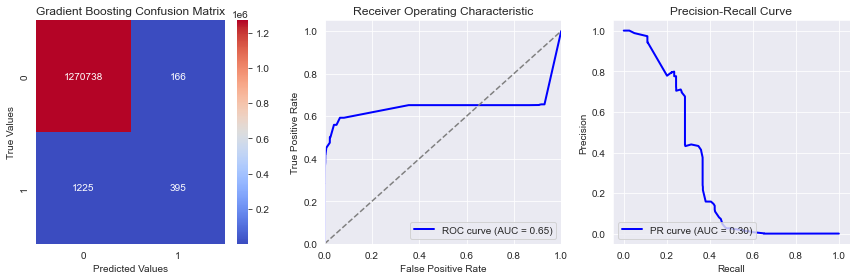

Gradient Boosting - Accuracy: 0.9989068968443817
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.70      0.24      0.36      1620

    accuracy                           1.00   1272524
   macro avg       0.85      0.62      0.68   1272524
weighted avg       1.00      1.00      1.00   1272524

Gradient Boosting - ROC AUC: 0.6463436901393333
Gradient Boosting - PR AUC: 0.3004663803611314


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Evaluation metrics
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)

# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# ROC curve and AUC
y_prob_gb = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

# Precision-Recall curve and AUC
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_prob_gb)
pr_auc_gb = auc(recall_gb, precision_gb)

# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(conf_matrix_gb, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Gradient Boosting Confusion Matrix")

# Plot ROC curve
plt.subplot(132)
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(133)
plt.plot(recall_gb, precision_gb, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_gb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Print the evaluation metrics
print("Gradient Boosting - Accuracy:", accuracy_gb)
print("Gradient Boosting - Classification Report:\n", classification_report_gb)
print("Gradient Boosting - ROC AUC:", roc_auc_gb)
print("Gradient Boosting - PR AUC:", pr_auc_gb)


### CARRYING OUT HYPERPARAMETER TUNING ON THE ORIGINAL DATASET

### 1. LOGISTIC REGRESSION

In [36]:
# Defining a function to evaluate the model
def assess(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    from sklearn import metrics
    from sklearn.metrics import classification_report    
    # To make predictions from model
    y_predict = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    # Printing all results
    print(f"The Training Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test,y_predict)}")
    
    # Plotting confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # ROC curve and PR curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_prob)
    
    # Plot ROC curve and PR curve
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(122)
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % metrics.auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    # Print the evaluation metrics
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    print("ROC AUC:", roc_auc)
    print("PR AUC:", pr_auc)


In [37]:
# Using GridSearchCV to carryout the hyperparameter tuning for logistic regression parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

params = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1],
    "max_iter": [100, 200],
    "solver": ["liblinear","lbfgs"]
}

grid = GridSearchCV(LogisticRegression(), params, n_jobs=-1, cv=3)

# fit the grid search object to the training data
grid.fit(X_train, y_train)

# print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")

* Best parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
  Accuracy:  0.9991772257349792
  F1-score:  0.9990223930514293

Results:
Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy: 0.9987067041563865 
F1-score: 0.9990223930514293

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'} 
Accuracy: nan 
F1-score: 0.9990223930514293

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} 
Accuracy: 0.9987047395570521 
F1-score: 0.9990223930514293

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'} 
Accuracy: 0.9987047395570521 
F1-score: 0.9990223930514293

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy: 0.9987067041563865 
F1-score: 0.9990223930514293

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs'} 
Accuracy: nan 
F1-score: 0.9990223930514293

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 

In [38]:
# To feed the training data to the model.
model = LogisticRegression(C=1, max_iter=100, penalty="l1", solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

The Training Accuracy of the Model is 0.999185869971804
The Testing Accuracy of the Model is 0.9991740823748707
The Model classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.88      0.41      0.56      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.70      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



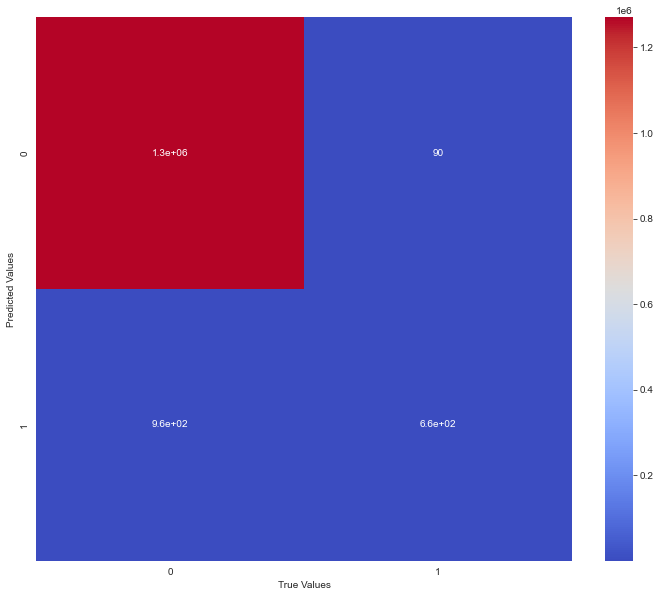

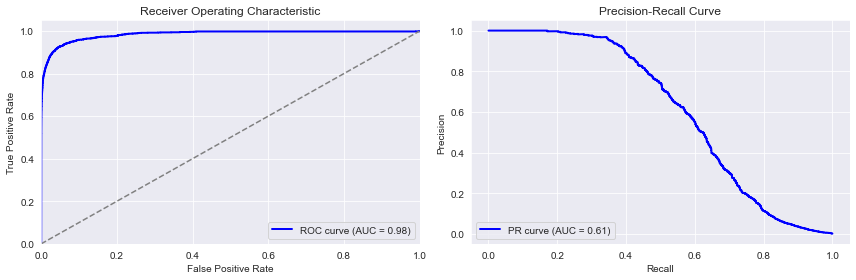

ROC AUC: 0.9844183488949211
PR AUC: 0.6088835136730678


In [39]:
# Evaluating the model performance on the test set
assess(model)

### 2. RANDOM FOREST CLASSIFIER (RFC)

In [40]:
# Using GridSearchCV to carryout the hyperparameter tuning for RFC parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object to search for the best parameters
grid = GridSearchCV(rfc, params, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# Print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy:  0.9996687685261731
  F1-score:  0.9996741498075795

Results:
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 
Accuracy: 0.9996646428664361 
F1-score: 0.9996741498075795

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 
Accuracy: 0.9996671968461962 
F1-score: 0.9996741498075795

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} 
Accuracy: 0.9996652322469773 
F1-score: 0.9996741498075795

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} 
Accuracy: 0.9996660180869658 
F1-score: 0.9996741498075795

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 
Accuracy: 0.9996654287071193 
F1-score: 0.9996741498075795

Params: {'max_depth': None, 'min_sa

In [41]:
# To feed the training data to the model.
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

The Training Accuracy of the Model is 0.9999833009043444
The Testing Accuracy of the Model is 0.9996911649603465
The Model classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.76      0.86      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



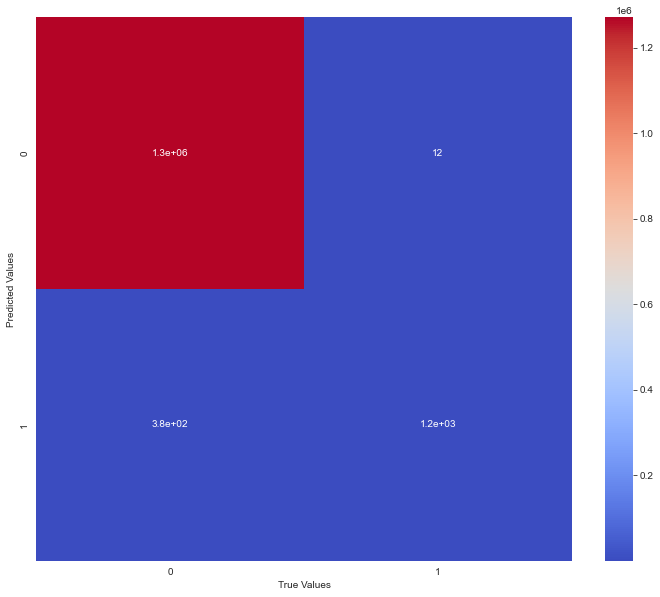

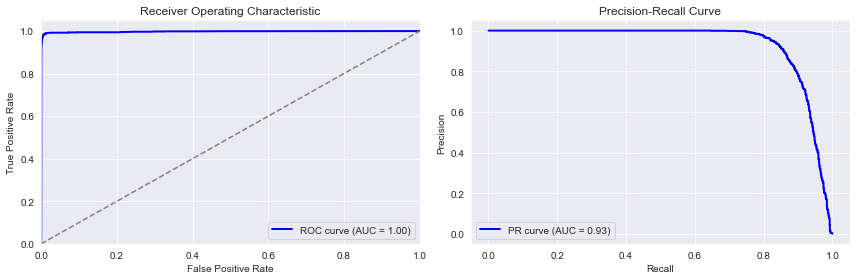

ROC AUC: 0.9977504070593319
PR AUC: 0.9329483034551437


In [42]:
# Evaluating the model performance on the test set
assess(model)

### K-NEAREST NEIGHBOR (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid to search
params = {
    "n_neighbors": [3, 5],
    "p": [1, 2],
}

# Create a K-Nearest Neighbors classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search for the best parameters
grid = GridSearchCV(knn, params, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# Print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'n_neighbors': 3, 'p': 2}
  Accuracy:  0.9987968792714214
  F1-score:  0.9983592836224428

Results:
Params: {'n_neighbors': 3, 'p': 1} 
Accuracy: 0.9987876456536692 
F1-score: 0.9983592836224428

Params: {'n_neighbors': 5, 'p': 1} 
Accuracy: 0.9987695713397223 
F1-score: 0.9983592836224428

Params: {'n_neighbors': 5, 'p': 2} 
Accuracy: 0.9987905925535973 
F1-score: 0.9983592836224428



In [44]:
# To feed the training data to the model.
model = KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Defining a function to evaluate the model
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    from sklearn import metrics
    from sklearn.metrics import classification_report    
    # To make predictions from model
    y_predict = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    # Printing all results
    print(f"The Training Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test,y_predict)}")
    
    # Plotting confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # Precision-recall curve
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_predict)
    
    # Plot Precision-Recall curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % metrics.auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    # Print the evaluation metrics
    print("PR AUC:", metrics.auc(recall, precision))

The Training Accuracy of the Model is 0.9989516897127284
The Testing Accuracy of the Model is 0.9988228119862572
The Model classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.82      0.10      0.17      1620

    accuracy                           1.00   1272524
   macro avg       0.91      0.55      0.59   1272524
weighted avg       1.00      1.00      1.00   1272524



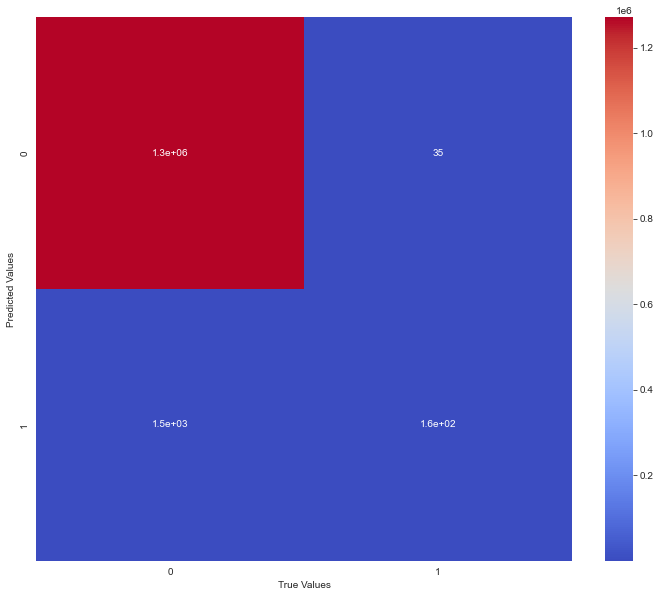

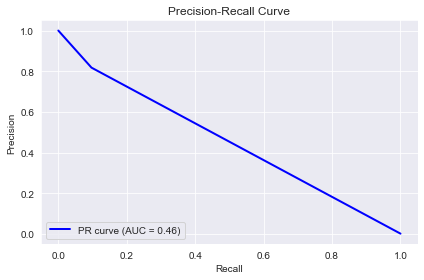

PR AUC: 0.45788579860057266


In [47]:
# Evaluating the model performance on the test set
evaluate(model)

### GRADIENT BOOSTING

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

# Defining a function to evaluate the model
def assess(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # To make predictions from model
    y_predict = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    # Printing all results
    print(f"The Training Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test, y_predict)}")
    
    # Plotting confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # ROC curve and PR curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_prob)
    
    # Plot ROC curve and PR curve
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(122)
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % metrics.auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    # Print the evaluation metrics
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    print("ROC AUC:", roc_auc)
    print("PR AUC:", pr_auc)






In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid
params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.1, 0.2]
}

# Create the GridSearchCV object with reduced parallelism
grid = GridSearchCV(GradientBoostingClassifier(), params, n_jobs=1, cv=3)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# Print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'learning_rate': 0.2, 'n_estimators': 100}
  Accuracy:  0.999277027395113
  F1-score:  0.9996005831017004

Results:
Params: {'learning_rate': 0.1, 'n_estimators': 100} 
Accuracy: 0.9980314714925324 
F1-score: 0.9996005831017004

Params: {'learning_rate': 0.1, 'n_estimators': 200} 
Accuracy: 0.9980216484970178 
F1-score: 0.9996005831017004

Params: {'learning_rate': 0.2, 'n_estimators': 200} 
Accuracy: 0.9992658291784896 
F1-score: 0.9996005831017004



In [33]:
# To feed the training data to the model.
best_gb = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], random_state=42)
best_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, random_state=42)

The Training Accuracy of the Model is 0.9996253508774687
The Testing Accuracy of the Model is 0.9996298694562932
The Model classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.72      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.86      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



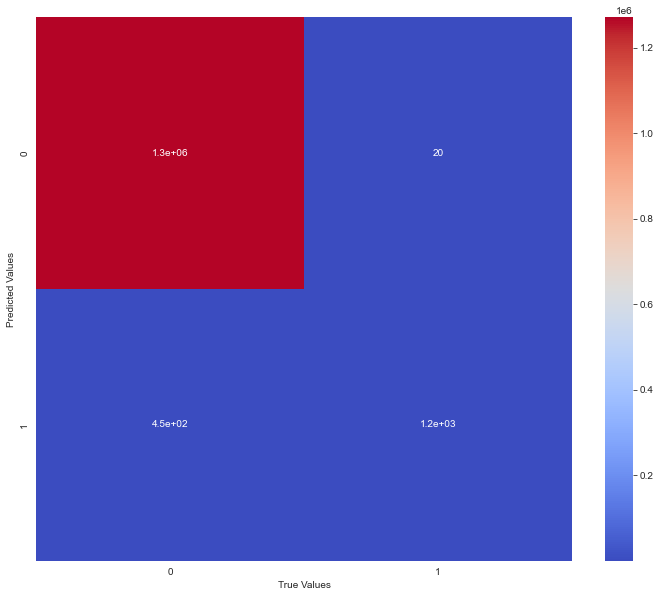

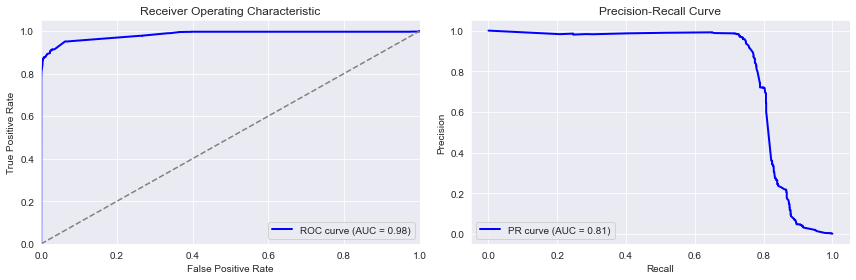

ROC AUC: 0.9837001357660996
PR AUC: 0.811166376342205


In [34]:
# Evaluating the model performance on the test set
assess(best_gb)